<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Intro_to_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Statistics in Python 
course by DataCamp
questions, exercises solved by me

## Summary Statistics

**Mean vs. median**

The mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

* Import matplotlib.pyplot with the alias plt.
* Subset food_consumption to get the rows where food_category is 'rice'.
* Create a histogram of co2_emission for rice and show the plot.

```
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']== 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()
```


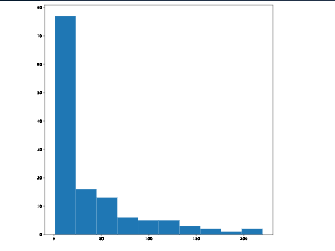

* Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?
>Right-skewed (tail on the right side)

* Use .agg() to calculate the mean and median of co2_emission for rice.

```
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))
```

```
<script.py> output:
    mean      37.591615
    median    15.200000
    Name: co2_emission, dtype: float64
```

* Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?
> Median!

###Measures of spread

* **Variance** - *Average distance from each data point to the data's mean*

**Calculating variance**

1.   To calculate the variance, we start by calculating the distance between each point and the mean, so we get one number for every data point. then square each distance.
2.   Then square each distance and then add them all together. 
3.   Finally, we divide the sum of squared distances by the number of data points minus 1, giving us the variance.

> *The higher the variance, the more spread out the data is.* 

```
#Subtract mean from each data point
dists = msleep['sleep_total'] - np.mean(msleep['sleep_total'])
print(dists)

#Square each distance
sq_dists = dists ** 2
print(sq_dists)

#Sum squared distances
sum_sq_dists = np.sum(sq_dists)
print(sum_sq_dists)

#Divide by number of data points - 1
variance = sum_sq_dists / (83 - 1)
print(variance)
```

**We can calculate the variance in one step using np-dot-var, setting the ddof argument to 1.**

! If we don't specify ddof equals 1, a slightly different formula is used to calculate variance that should only be used on a full population, not a sample.

```
#Use np.var()
np.var(msleep['sleep_total'], ddof=1)

#Without ddof=1 , population variance is calculated instead of sample variance :
np.var(msleep['sleep_total'])
```


* **Standard deviation** - *The standard deviation is another measure of spread, calculated by taking the square root of the variance.* 

!Units are usually easier to understand since they're not squared.

```
#Standard deviation
np.sqrt(np.var(msleep['sleep_total'], ddof=1))

#or in one line:
np.std(msleep['sleep_total'], ddof=1)
```

* **Mean absolute deviation** -  *takes the absolute value of the distances to the mean, and then takes the mean of those differences.* 

> Similar to standard deviation, it's not exactly the same. Standard deviation squares distances, so longer distances are penalized more than shorter ones, while mean absolute deviation penalizes each distance equally. One isn't better than the other, but SD is more common than MAD.

```
dists = msleep['sleep_total'] - mean(msleep$sleep_total)
np.mean(np.abs(dists))
```


* **Quantiles** - *or percentiles, split up the data into some number of equal parts* 

```
np.quantile(msleep['sleep_total'], 0.5)

#We can also pass in a list of numbers to get multiple quantiles at once.
np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1])

#Quartiles:
np.quantile(msleep['sleep_total'], [0, 0.25, 0.5, 0.75, 1])
```


* **Boxplots use quartiles** - * The boxes in box plots represent quartiles. The bottom of the box is the first quartile, and the top of the box is the third quartile. The middle line is the second quartile, or the median.*

```
 import matplotlib.pyplot as plt
plt.boxplot(msleep['sleep_total'])
plt.show()
```
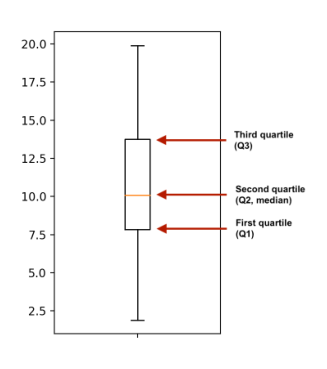


* **Quantiles using np.linspace()** - *split the data in five equal pieces, while using ```np.linspace``` - which takes in the starting number, the stopping number, and the number intervals. We can compute the same quantiles using np-dot-linspace starting at zero, stopping at one, splitting into 5 different intervals.*

```
#np.linspace(start, stop, num)
np.quantile(msleep['sleep_total'], np.linspace(0, 1, 5))
```

* **Interquartile range (IQR)** - *The interquartile range, or IQR, is another measure of spread. It's the distance between the 25th and 75th percentile, which is also the height of the box in a boxplot. We can calculate it using the quantile function, or using the iqr function from scipy-dot-stats to get 5-point-9 hours.*

```
np.quantile(msleep['sleep_total'], 0.75) - np.quantile(msleep['sleep_total'], 0.25)

#or
from scipy.stats import iqr
iqr(msleep['sleep_total'])
```
* **Outliers** - *data points that are substantially different from the others.  But how do we know what a substantial difference is? A rule that's often used is that any data point less than the first quartile minus 1-point-5 times the IQR is an outlier, as well as any point greater than the third quartile plus 1-point-5 times the IQR.*

```
#Finding outliers

from scipy.stats import iqr
iqr = iqr(msleep['bodywt'])
lower_threshold = np.quantile(msleep['bodywt'], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(msleep['bodywt'], 0.75) + 1.5 * iqr
msleep[(msleep['bodywt'] < lower_threshold) | (msleep['bodywt'] > upper_threshold)]
```

* **.describe()** - method for almost every summary statistics to be calculate by inputting just a one line of code. Useful to generally understand the data.

```
msleep['bodywt'].describe()
```

```
count 83.000000
mean 166.136349
std 786.839732
min 0.005000
25% 0.174000
50% 1.670000
75% 41.750000
max 6654.000000
Name: bodywt, dtype: float64
```



**Quartiles, quantiles, and quintiles**

*Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.*

*In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.*


* Calculate the quartiles of the co2_emission column of food_consumption.

```
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))
```
```
[   0.        5.21     16.53     62.5975 1712.    ]
```

* Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.

```
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))
```
```
 [   0.       3.54    11.026   25.59    99.978 1712.   ]
```

* Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

```
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))
```

```
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
     2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]
```

> While calculating more quantiles gives you a more detailed look at the data, it also produces more numbers, making the summary more difficult to quickly understand.






**Variance and standard deviation**

> Variance and standard deviation are two of the most common ways to measure the spread of a variable. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

* Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.
* Import matplotlib.pyplot with alias plt.
* Create a histogram of co2_emission for the beef food_category and show the plot.
* Create a histogram of co2_emission for the eggs food_category and show the plot.

```
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()
```

```
                         var         std
    food_category                          
    beef           88748.408132  297.906710
    dairy          17671.891985  132.935669
    eggs              21.371819    4.622966
    fish             921.637349   30.358481
    lamb_goat      16475.518363  128.356996
    nuts              35.639652    5.969895
    pork            3094.963537   55.632396
    poultry          245.026801   15.653332
    rice            2281.376243   47.763754
    soybeans           0.879882    0.938020
    wheat             71.023937    8.427570
```

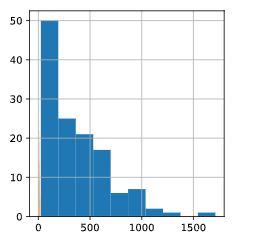


> Beef has the largest amount of variation in its CO2 emissions, while eggs have a relatively small amount of variation.

**Finding outliers using IQR**

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers.

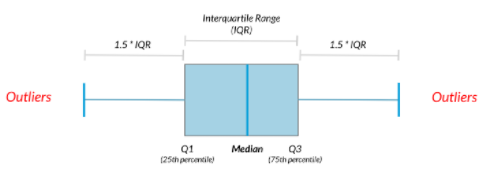

* Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country.

```
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
```
```
country
    Albania      1777.85
    Algeria       707.88
    Angola        412.99
    Argentina    2172.40
    Armenia      1109.93
                  ...   
    Uruguay      1634.91
    Venezuela    1104.10
    Vietnam       641.51
    Zambia        225.30
    Zimbabwe      350.33
    Name: co2_emission, Length: 130, dtype: float64
```

* Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.
* Calculate the interquartile range of emissions_by_country and store it as iqr.

```
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
```

* Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.

```
# Calculate the lower and upper cutoffs for outliers
lower= q1 - 1.5 * iqr
upper= q3 + 1.5 * iqr
```

* Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

```
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)
```

```
<script.py> output:
    country
    Argentina    2172.4
    Name: co2_emission, dtype: float64
```

>  It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.




##Random Numbers and Probability

###What are the chances?

>  How to generate random samples and measure chance using probability.

**Measuring chance**

We can calculate the probability of some event by taking the number of ways the event can happen and dividing it by the total number of possible outcomes. For example, if we flip a coin, it can land on either heads or tails. To get the probability of the coin landing on heads, we divide the 1 way to get heads by the two possible outcomes, heads and tails. This gives us one half, or a fifty percent chance of getting heads. Probability is always between zero and 100 percent. If the probability of something is zero, it's impossible, and if the probability of something is 100%, it will certainly happen.

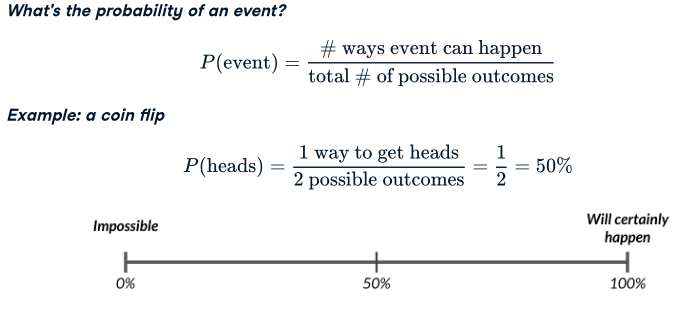



**Sampling**

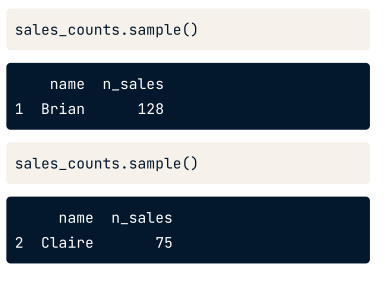

**Setting a random seed** *To ensure we get the same results when we run the script in front of the team, we'll set the random seed using np-dot-random-dot-seed. The seed is a number that Python's random number generator uses as a starting point, so if we orient it with a seed number, it will generate the same random value each time.*

```
np.random.seed(10)
sales_counts.sample()
```



**Sampling without replacement** *When sampling without replacement the number of possible outcomes is decresing. So if we have 4 possible outcomes, and in the last sampling one of them was selected - with chances of selecting it 1/4 (25%) - with the second sampling without replacement, chances of selecting some outcome will be 33% (1/3). Because we have one less possible to pick from.*

**Sampling with replacement** *When sampling with replacement, we are sampling from the set of data which was used in the first sampling. So the possibility of picking some of the outcome is 25% (1/4).*

```
sales_counts.sample(5, replace = True)
```



**Calculating probabilities**

* Count the number of deals Amir worked on for each product type and store in counts.

```
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)
```

* Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as probs.
```
In [4]:
len(amir_deals)
Out[4]:
178
```

```
# Calculate probability of picking a deal with each product
probs = counts/178
print(probs)
```

```
<script.py> output:
    Product B    0.348315
    Product D    0.224719
    Product A    0.129213
    Product C    0.084270
    Product F    0.061798
    Product H    0.044944
    Product I    0.039326
    Product E    0.028090
    Product N    0.016854
    Product G    0.011236
    Product J    0.011236
    Name: product, dtype: float64
```

* If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

> 8.43%



**Sampling deals**

* Set the random seed to 24.
* Take a sample of 5 deals without replacement and store them as sample_without_replacement.

```
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)
```

```
<script.py> output:
         Unnamed: 0    product   client status   amount  num_users
    127         128  Product B  Current    Won  2070.25          7
    148         149  Product D  Current    Won  3485.48         52
    77           78  Product B  Current    Won  6252.30         27
    104         105  Product D  Current    Won  4110.98         39
    166         167  Product C      New   Lost  3779.86         11
```

* Take a sample of 5 deals with replacement and save as sample_with_replacement.

```
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)
```

```
     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63
```




**Discrete distributions**

**Probability distribution** *A probability distribution describes the probability of each possible outcome in a scenario. We can also talk about the expected value of a distribution, which is the mean of a distribution. We can calculate this by multiplying each value by its probabilityand summing.*

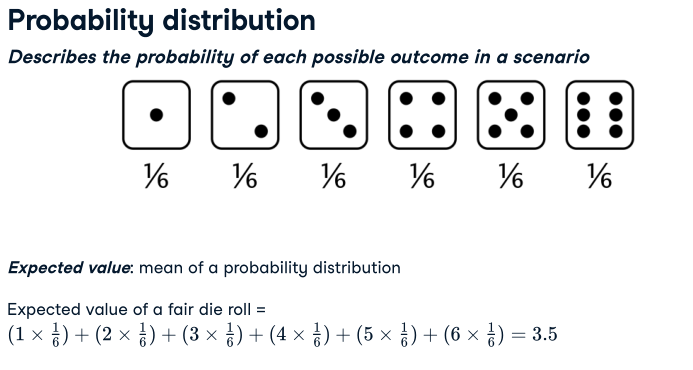

* 

**Visualizing a probability distribution** *using a barplot, where each bar represents an outcome, and each bar's height represents the probability of that outcome.*

We can calculate probabilities of different outcomes by taking areas of the probability distribution. For example, what's the probability that our die roll is less than or equal to 2? To figure this out, we'll take the area of each bar representing an outcome of 2 or less.

Each bar has a width of 1 and a height of one sixth, so the area of each bar is one sixth. We'll sum the areas for 1 and 2, to get a total probability of one third.

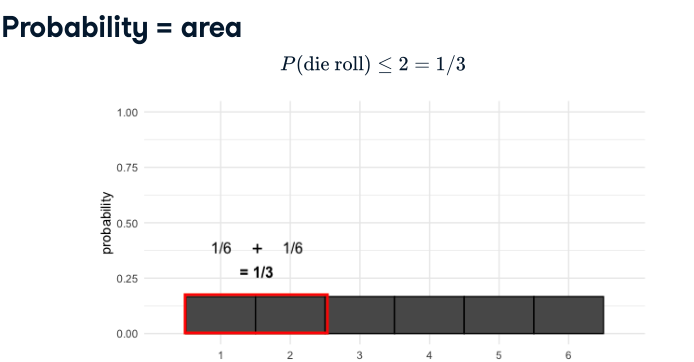



**Uneven die**

Now let's say we have a die where the two got turned into a three. This means that we now have a 0% chance of getting a 2, and a 33% chance of getting a 3. To calculate the expected value of this die, we now multiply 2 by 0, since it's impossible to get a 2, and 3 by its new probability, one third. This gives us an expected value that's slightly higher than the fair die.

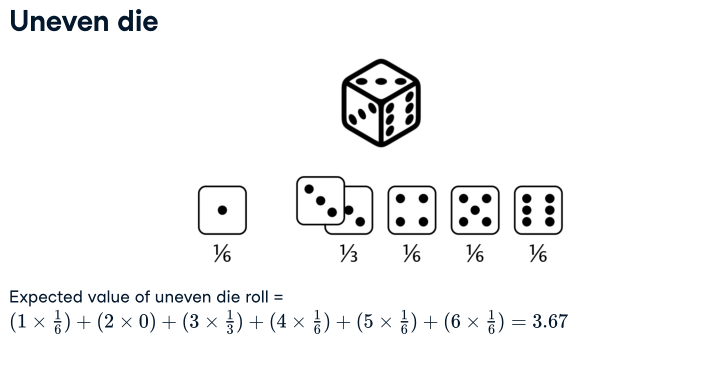

Bars will not be even any longer. 

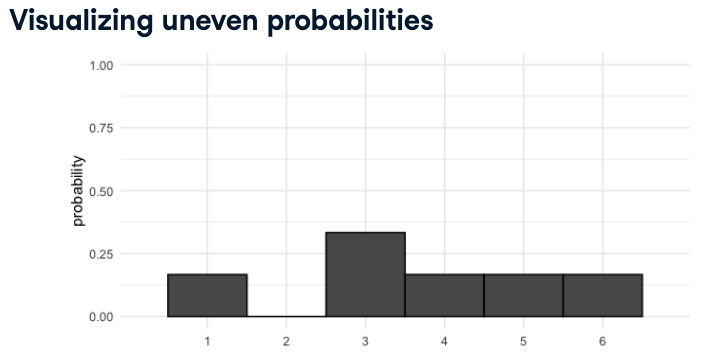

**Discrete probability distributions**

The probability distributions you've seen so far are both discrete probability distributions, since they represent situations with discrete outcomes. Recall from chapter 1 that discrete variables can be thought of as counted variables. When all outcomes have the same probability, like a fair die, this is a special distribution called a *discrete uniform distribution*.


```
#Sampling from discrete distributions
rolls_10 = die.sample(10, replace = True)

#Visualizing a sample
rolls_10['number'].hist(bins=np.linspace(1,7,7))
plt.show()
```

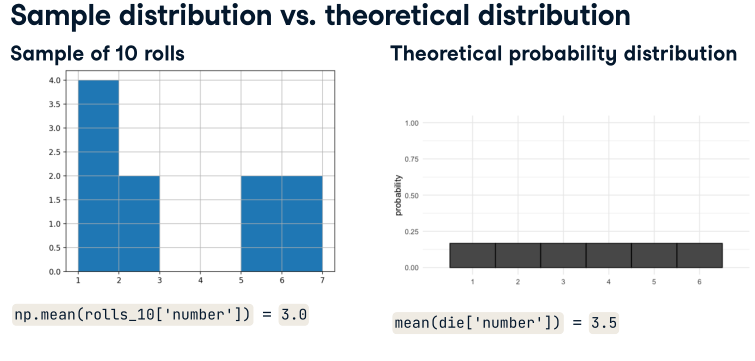



> We can visualize the outcomes of the ten rolls using a histogram, defining the bins we want using np-dot-linspace.

As the size of your sample increases, the sample mean will approach the expected value. This is called the **law of large numbers**, which is the idea that as the size of your sample increases, the sample mean will approach the theoretical mean.


**Creating a probability distribution**

Investigate the probability of groups of different sizes getting picked first.

* Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6]. Remember to show the plot.

```
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()
```
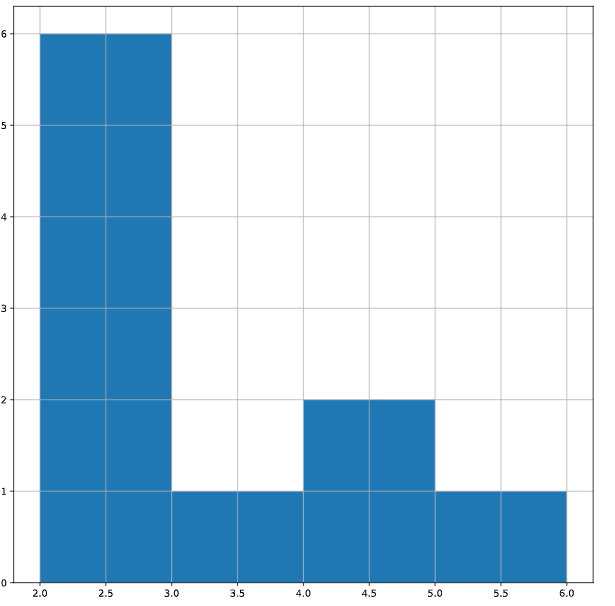


* Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.

```
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / 10

# Reset index and rename columns
size_dist = size_dist.reset_index(drop=True)
size_dist.columns = ['group_size', 'prob']

print(size_dist)
```

```
<script.py> output:
    0    0.6
    1    0.2
    2    0.1
    3    0.1
    Name: group_size, dtype: float64
```

* Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

```
# Calculate expected value
expected_value = np.sum(size_dist['group_size']*size_dist['prob'])
print(expected_value)
```

```
2.9000000000000004
```

* Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

```
# Subset groups of size 4 or more
groups_4_or_more = size_dist['group_size'] >= 4

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more * size_dist['prob'])
print(prob_4_or_more)
```

```
<script.py> output:
    0.30000000000000004
```

**Continuous distributions** *A distribution in which the number is continous. Meaning can be any number (float). Unlike in a discrete distributions in which we are dealing with certain/finished quantity of numbers (dice).*

**Continuous uniform distribution**

There are an infinite number of minutes we could wait since we could wait 1 minute, 1-point-5 minutes, 1-point-53 minutes, and so on, so we can't create individual blocks like we could with a discrete variable. Instead, we'll use a continuous line to represent probability. The line is flat since there's the same probability of waiting any time from 0 to 12 minutes. This is called the continuous uniform distribution.


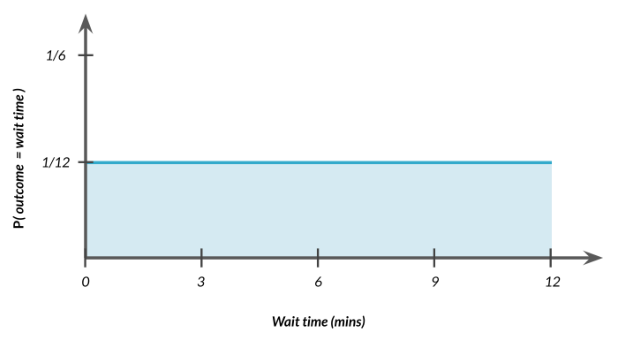




**Probability still = area**

As well as with a discrete distribution, wwe can calculate what is the probibility of occurance of an event in the area of 4-7 minutes (f.e.)

The width of this rectangle is 7 minus 4 which is 3. The height is one twelfth(because max time is 12 minutes).

Multiplying those together to get area, we get 3/12 or 25%.
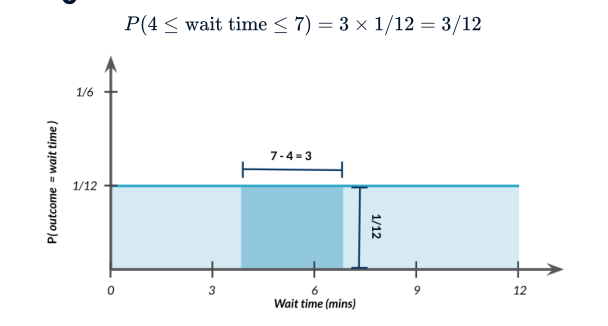


**Uniform distribution in Python**

We can use Python's uniform distribution from scipy lib to calculate the probability. 

```
from scipy.stats import uniform
uniform.cdf(7, 0, 12)
```
We passed to the function our 7 minutes, and the min and max limit of wait time. In this way we'll calculate the probability of waiting less than 7 minutes. 

If we want the probability of waiting more than 7 minutes, we need to take 1 minus the probability of waiting less than 7 minutes.

```
from scipy.stats import uniform
1 - uniform.cdf(7, 0, 12)
```

**Combining multiple uniform.cdf() calls** *calculating probability in a range with Python*

Let's calculate the probability of waiting 4 to 7 minutes. 
  * start with the probability of waiting less than 7 minutes,
  * then subtract the probability of waiting less than 4 minutes. 

```
from scipy.stats import uniform
uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)
```
```
0.25
```
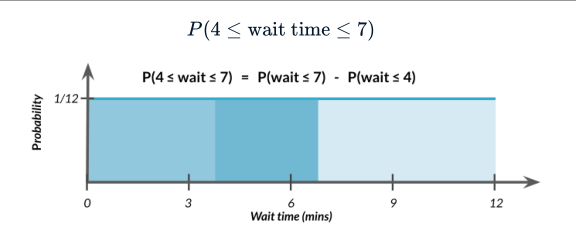


**Total area = 1**

To calculate the probability of waiting between 0 and 12 minutes, we multiply 12 by 1/12, which is 1. We'll wait for the bus from 0 to 12 minutes, which has 100% probability.

**Generating random numbers according to uniform distribution** *with uniform.rvs*

Takes in the minimum value, maximum value, followed by the number of random values we want to generate. Here, we generate 10 random values between 0 and 5.

```
from scipy.stats import uniform
uniform.rvs(0, 5, size=10)
```
```
array([1.89740094, 4.70673196, 0.33224683, 1.0137103 , 2.31641255,
3.49969897, 0.29688598, 0.92057234, 4.71086658, 1.56815855])
```

Other continuous distributions. Continous distibutions can take many forms. But one thing is true to any distribution. The area benneath it must always be equal to one. 

**How long he'll have to wait for his newly-entered data to get backed up?**

* To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.

```
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30
```

* Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.

```
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)
```

```
<script.py> output:
    0.16666666666666666
```

* Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.

```
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)
```
```
<script.py> output:
    0.8333333333333334
```


* Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.

```
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30)
print(prob_between_10_and_20)
```

```
<script.py> output:
    0.3333333333333333
```

**Simulating wait times**
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect.

* Set the random seed to 334 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed to 334
np.random.seed(334)

In [ ]:
from scipy.stats import uniform



* Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.

In [ ]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

* Create a histogram of the simulated wait times and show the plot.

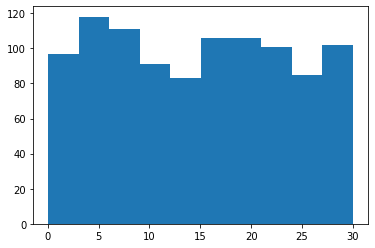

In [ ]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

>  It looks like he'll wait about 15 minutes on average.


###The binomial distribution

*The binomial distribution describes the probability of the number of successes in a sequence of independent trials. In other words, it can tell us the probability of getting some number of heads in a sequence of coin flips.*

> Note that this is a discrete distribution since we're working with a countable outcome. 


**Simulating binary outcomes**
We can simulate binary outcomes (1/0, True/False) by importing binom from scipy-dot-stats and using the binom-dot-rvs function, which takes in the number of coins we want to flip, the probability of heads or success, and an argument called size, which is number of trials. size is a named argument, so we'll need to explicitly specify that the third argument corresponds to size, or we'll get incorrect results. This call will return a 1, which we'll count as a head, or a 0, which we'll count as tails. We can use binom-dot-rvs 1, 0-point-5, size equals 1 to flip 1 coin, with a 50% probability of heads, 1 time.

```
#binom.rvs(# of coins, probability of heads/success, size=# of trials)
#1 = head, 0 = tails
from scipy.stats import binom
binom.rvs(1, 0.5, size=1)
```

```
array([1])
```

```
#Simulating multiple binary outcomes
binom.rvs(1, 0.5, size=8)
```

```
array([0, 1, 1, 0, 1, 0, 1, 1])
```

* Many flips one time

If we swap the first and last arguments, we flip eight coins one time. This gives us one number, which is the total number of heads or successes.

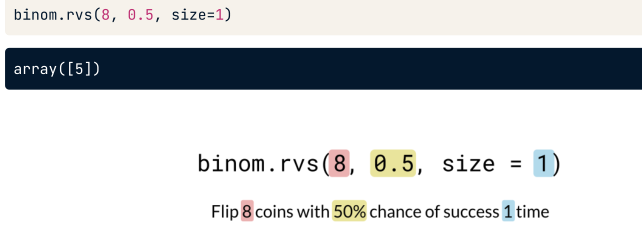



* Many flips many times

We can pass 3 as the first argument, and set size equal to 10 to flip 3 coins. This returns 10 numbers, each representing the total number of heads from each set of flips.
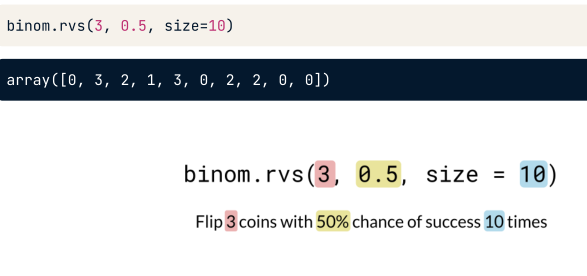


* Other probabilities

We could also have a coin that's heavier on one side than the other, so the probability of getting heads is only 25%. To simulate flips with this coin, we'll adjust the second argument of binom-dot-rvs to 0-point-25. The result has lower numbers, since getting multiple heads isn't as likely with the new coin.

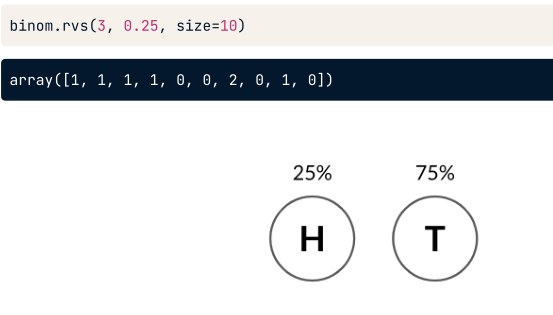

**Binomial distribution**

The binomial distribution can be described using two parameters, n and p. n represents the total number of trials being performed, and p is the probability of success. n and p are also the third and second arguments of binom-dot-rvs. 

> Here's what the distribution looks like for 10 coins. We have the biggest chance of getting 5 heads total, and a much smaller chance of getting 0 heads or 10 heads.

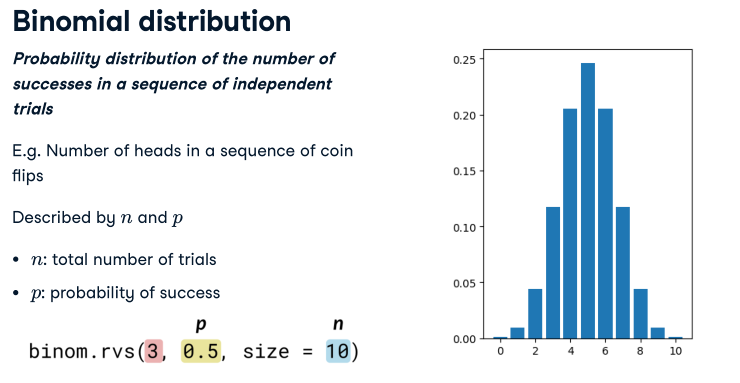

**What's the probability of 7 heads?**

To get the probability of getting 7 heads out of 10 coins, we can use binom-dot-pmf. The first argument is the number of heads or successes. The second argument is the number of trials, n, and the third is the probability of success, p. 

>If we flip 10 coins, there's about a 12% chance that exactly 7 of them will be heads.

```
# binom.pmf(num heads, num trials, prob of heads)
binom.pmf(7, 10, 0.5)
```

```
0.1171875
```

**What's the probability of 7 or fewer heads?**
P(heads ≤ 7)

```
binom.cdf(7, 10, 0.5)
```
```
0.9453125
```

**What's the probability of more than 7 heads?**

We can take 1 minus the probability of getting 7 or fewer heads to get the probability of a number of successes greater than the first argument.

```
1 - binom.cdf(7, 10, 0.5)
```

```
0.0546875
```

**Expected value**

The expected value of the binomial distribution can be calculated by multiplying n times p. The expected number of heads we'll get from flipping 10 coins is 10 times 0-point-5, which is 5.
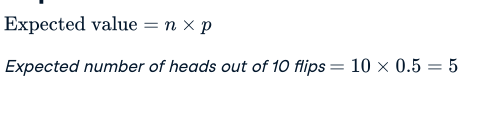


*The binomial distribution is a probability
distribution of the number of successes in a
sequence of independent trials*

> Probabilities of second trial are altered due to
outcome of the first.
**If trials are not independent (sampling with replacement), the binomial
distribution does not apply!**

**Binary simulations of sales deals**

* Import binom from scipy.stats and set the random seed to 10.


In [ ]:
import numpy as np
from scipy.stats import binom

np.random.seed(10)

* Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

In [ ]:
print(binom.rvs(1, 0.3, size=1))

[1]


* Simulate a typical week of Amir's deals, or one week of 3 deals.

In [ ]:
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

[0]


* Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
* Print the mean number of deals he won per week.

In [ ]:
deals = binom.rvs(3, 0.3, size=52)

# Print mean deals won per week
print(np.mean(deals))

0.8461538461538461


>  In this simulated year, Amir won 0.84 deals on average each week.

**Calculating binomial probabilities**

What the chances are of closing different numbers of deals using the binomial distribution?

* What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.



In [ ]:
from scipy.stats import binom

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999982


* What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.

In [ ]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.7839999999999999


* What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.


In [ ]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21600000000000008


**How many sales will be won? Binomial distribution with changing win rates**

Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations.

> expected value of a binomial distribution can be calculated by n * p

* Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
* Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

In [ ]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


##More Distributions and the Central Limit Theorem

###The normal distribution

The normal distribution shape is commonly referred to as a "bell curve". The normal distribution has a few important properties:
*  it's symmetrical, so the left side is a mirror image of the right
* just like any continuous distribution, the area beneath the curve is 1
* the probability never hits 0, even if it looks like it does at the tail ends. Only 0.006% of its area is contained beyond the edges of this graph
*  is described by its mean and standard deviation.

**Described by mean and standard deviation**

Here is a normal distribution with a mean of 20 and standard deviation of 3, and here is a normal distribution with a mean of 0 and a standard deviation of 1. When a **normal distribution has mean 0 and a standard deviation of 1, it's a special distribution called the standard normal distribution.** Notice how both distributions have the same shape, but their axes have different scales.


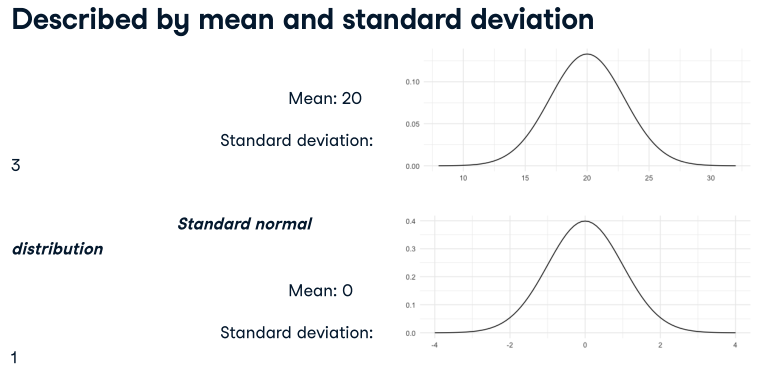


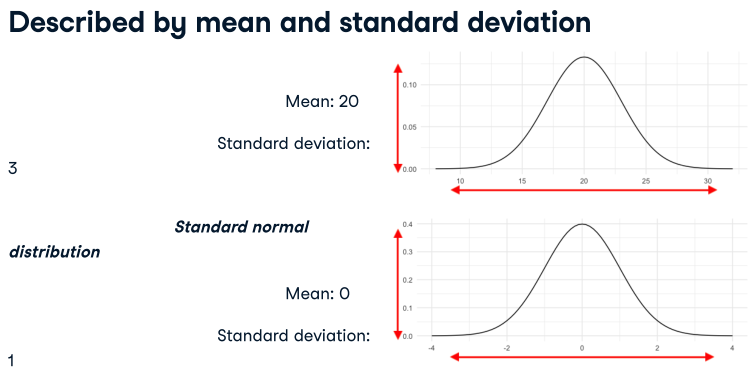

**Areas under the normal distribution**

For normal distribution:
* 68% of the area is within 1 standard deviation of the mean
* 95% of the area falls within 2 standard deviations of the mean
* and 99.7% of the area falls within three standard deviations.

> This is sometimes called the 68-95-99.7 rule.

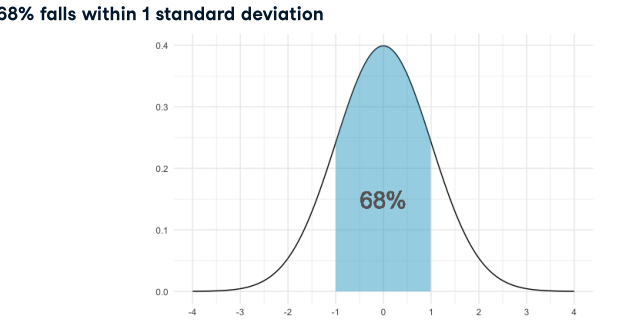

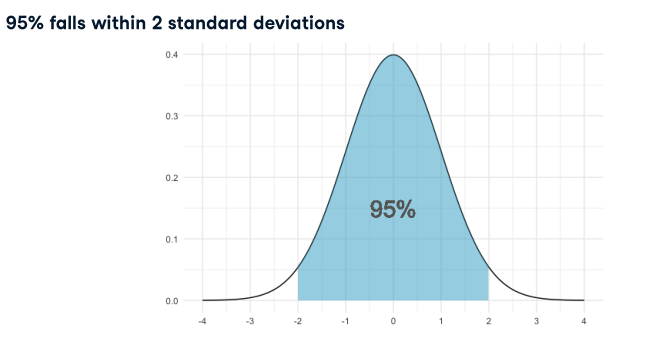

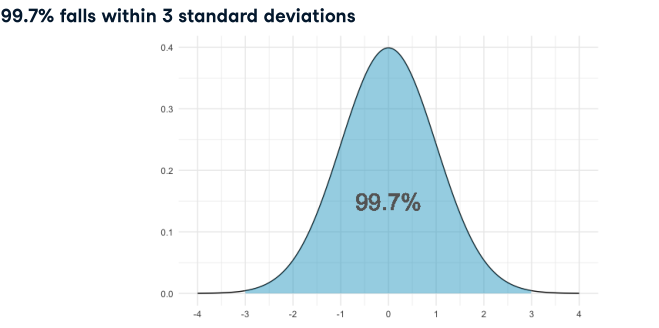

**Real world example of normal distribution**

* A histogram of the heights of women that participated in the National Health and Nutrition Examination Survey. The mean height is around 161 centimeters and the standard deviation is about 7 centimeters.

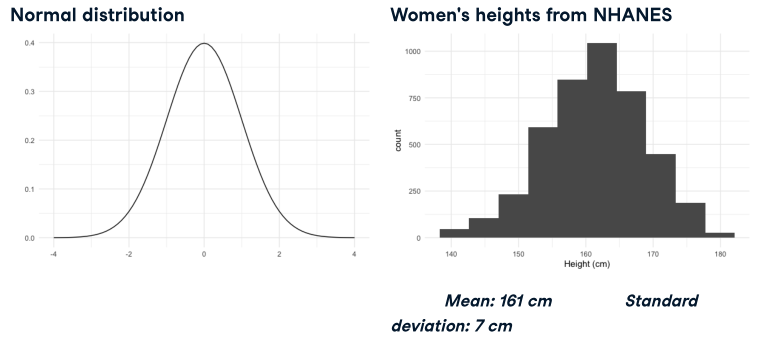

**Approximating data with the normal distribution**

Since this height data closely resembles the normal distribution, we can take the area under a normal distribution with mean 161 and standard deviation 7 to approximate what percent of women fall into different height ranges.

> What percent of women are shorter than 154 cm?

We can answer this using norm.cdf from scipy.stats, which takes the area of the normal distribution less than some number. We pass in the number of interest, 154, followed by the mean and standard deviation of the normal distribution we're using. This gives us about 16% of women are shorter than 154 centimeters.

```
from scipy.stats import norm
norm.cdf(154, 161, 7)
```

```
0.158655
```

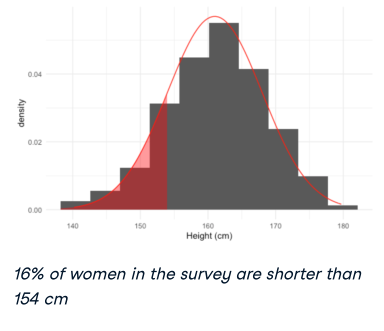



> What percent of women are taller than 154 cm?

To find the percent of women taller than 154 centimeters, we can take 1 minus the area on the left of 154, which equals the area to the right of 154.

```
from scipy.stats import norm
1 - norm.cdf(154, 161, 7)
```

```
0.841345
```

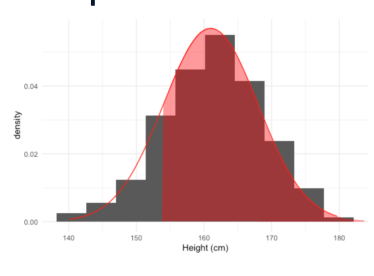

> What percent of women are 154-157 cm?

To get the percent of women between 154 and 157 centimeters tall we can take the area below 157 and subtract the area below 154, which leaves us the area between 154 and 157.

```
norm.cdf(157, 161, 7) - norm.cdf(154, 161, 7)
```

```
0.1252
```
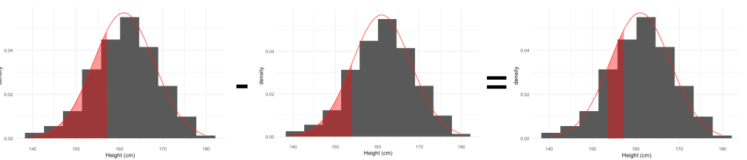


> What height are 90% of women shorter than?

We can also calculate percentages from heights using norm.ppf. To figure out what height 90% of women are shorter than, we pass 0.9 into norm.ppf along with the same mean and standard deviation we've been working with. This tells us that 90% of women are shorter than 170 centimeters tall.

```
norm.ppf(0.9, 161, 7)
```
```
169.97086
```
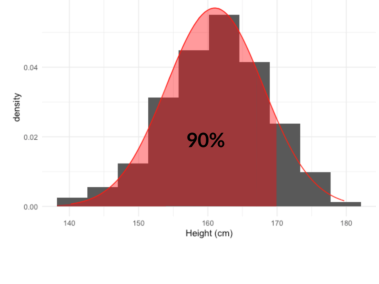
> What height are 90% of women taller than?

We can figure out the height 90% of women are taller than, since this is also the height that 10% of women are shorter than. We can take 1 minus 0.9 to get point-1, which we'll use as the first argument of norm-ppf.

```
norm.ppf((1-0.9), 161, 7)
```

```
152.029
```
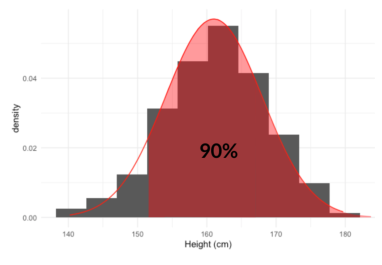

**Generating random numbers from normal distribution**

using norm.rvs, passing in the distribution's mean and standard deviation, as well as the sample size we want. Here, we've generated 10 more random heights.

```
norm.rvs(161, 7, size=10)
```

```
array([155.5758223 , 155.13133235, 160.06377097, 168.33345778,
165.92273375, 163.32677057, 165.13280753, 146.36133538,
149.07845021, 160.5790856 ])
```


**Estimating the probability of selling for different amounts of money**

* Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.

```
amir_deals['amount'].hist(bins=10)
plt.show()
```
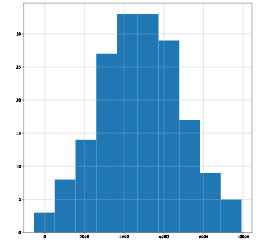


> Which probability distribution do the sales amounts most closely follow?


Normal


**Probabilities from the normal distribution**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

* What's the probability of Amir closing a deal worth less than $7500?




```
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)
```
```
<script.py> output:
    0.8943502263331446
```

* What's the probability of Amir closing a deal worth more than $1000?

```
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)
```

```
<script.py> output:
    0.9772498680518208
```

* What's the probability of Amir closing a deal worth between $3000 and $7000?

```
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)
```

```
<script.py> output:
    0.6826894921370859
```

* What amount will 25% of Amir's sales be less than?

```
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)
```

```
<script.py> output:
    3651.0204996078364
```

**Simulating sales under new market conditions**

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by 20% and the volatility, or standard deviation, of each sale's worth will increase by 30%. 

* Currently, Amir's average sale amount is 5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.
* Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.
* Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.
* Plot the distribution of the new_sales amounts using a histogram and show the plot.

```
# Calculate new average amount
new_mean = 5000 *1.2

# Calculate new standard deviation
new_sd = 2000 *1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()
```
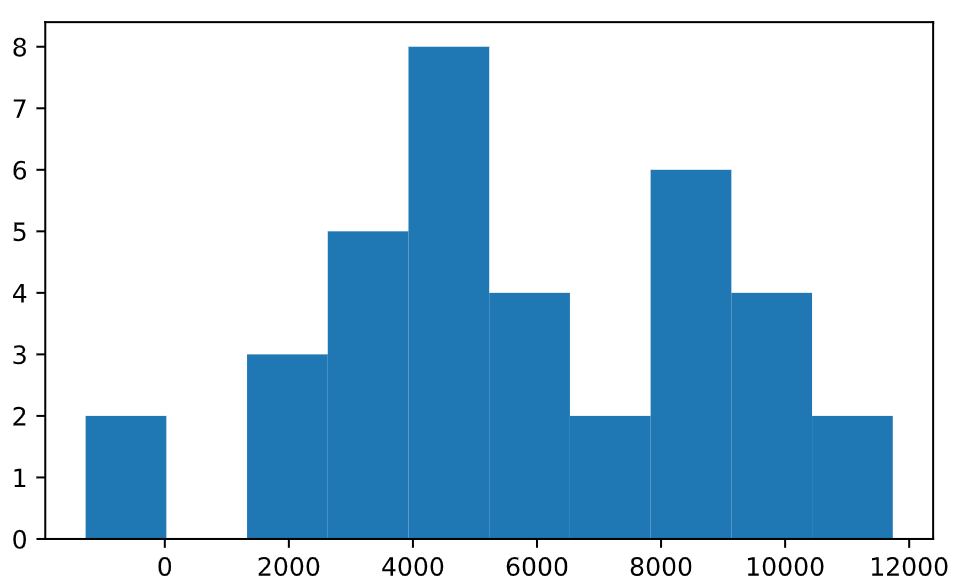

> Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. 


###The central limit theorem

*A sampling distribution will approach a normal distribution as the number of trials increases*

The sampling distribution became closer to the normal distribution as we took more and more sample means. It's important to note that the central limit theorem only applies when samples are taken randomly and are independent, for example, randomly picking sales deals with replacement.

**Sampling distributions**

*Rolling the dice 5 times*

We have a Series of the numbers 1 to 6 called die. To simulate rolling the die 5 times, we'll call ```die.sample```. We pass in the Series we want to sample from, the size of the sample, and set replace to True. This gives us the results of 5 rolls. Now, we'll take the mean of the 5 rolls, which gives us 2.
```
die = pd.Series([1, 2, 3, 4, 5, 6])
# Roll 5 times
samp_5 = die.sample(5, replace=True)
print(samp_5)
```
```
array([3, 1, 4, 1, 1]
```
```
np.mean(samp_5)
```
```
2.0
```

If we roll another 5 times and take the mean, we get a different mean. If we do it again, we get another mean.

```
samp_5 = die.sample(5, replace=True)
np.mean(samp_5)
```
```
4.4
```
```
samp_5 = die.sample(5, replace=True)
np.mean(samp_5)
```
```
3.8
```
*Rolling the dice 5 times 10 times*

Let's repeat this 10 times: we'll roll 5 times and take the mean. To do this, we'll use a for loop. We start by creating an empty list called sample_means to hold our means. We loop from 0 to 9 so that the process is repeated 10 times. Inside the loop, we roll 5 times and append the sample's mean to the sample_means list. This gives us a list of 10 different sample means. Let's plot these sample means.

```

sample_means = []
for i in range(10):
  samp_5 = die.sample(5, replace=True)
  sample_means.append(np.mean(samp_5))
print(sample_means)
```

```
[3.8, 4.0, 3.8, 3.6, 3.2, 4.8, 2.6,
3.0, 2.6, 2.0]
```
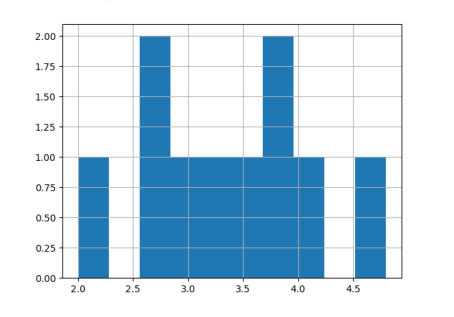

*100 sample means*

If we look at the new sampling distribution, its shape somewhat resembles the normal distribution, even though the distribution of the die is uniform.

```
sample_means = []
for i in range(100):
  sample_means.append(np.mean(die.sample(5, replace=True)))
```
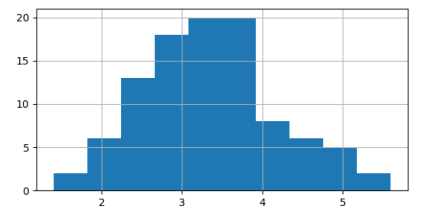

*1000 sample means*

Let's take 1000 means. This sampling distribution more closely resembles the normal distribution.

```
sample_means = []
for i in range(1000):
  sample_means.append(np.mean(die.sample(5, replace=True)))
```

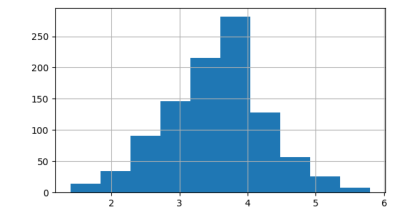



*Standard deviation and the CLT*

The central limit theorem, or CLT, applies to other summary statistics as well. If we take the standard deviation of 5 rolls 1000 times, the sample standard deviations are distributed normally, centered around 1-point-9, which is the distribution's standard deviation.

```
sample_sds = []
for i in range(1000):
  sample_sds.append(np.std(die.sample(5, replace=True)))
```

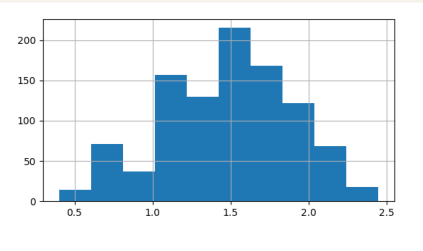


*Proportions and the CLT*

Another statistic that the CLT applies to is proportion. Let's sample from the sales team 10 times with replacement and see how many draws have Claire as the outcome. In this case, 10% of draws were Claire. If we draw again, there are 40% Claires.

```
sales_team = pd.Series(["Amir", "Brian", "Claire", "Damian"])
sales_team.sample(10, replace=True)
```
```
array(['Claire', 'Damian', 'Brian', 'Damian', 'Damian', 'Amir', 'Amir', 'Amir',
'Amir', 'Damian'], dtype=object)
```
```
sales_team.sample(10, replace=True)
```
```
array(['Brian', 'Amir', 'Brian', 'Claire', 'Brian', 'Damian', 'Claire', 'Brian',
'Claire', 'Claire'], dtype=object)
```

*Sampling distribution of proportion*

If we repeat this 1000 times and plot the distribution of the sample proportions, it resembles a normal distribution centered around 0.25, since Claire's name was on 25% of the tickets.


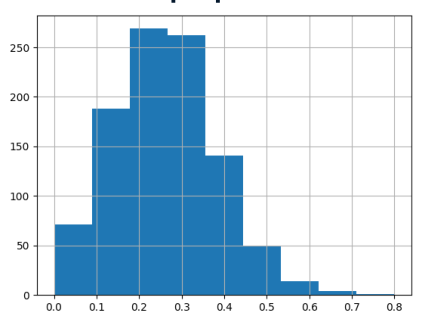

*Mean of sampling distribution*

Since these sampling distributions are normal, we can take their mean to get an estimate of a distribution's mean, standard deviation, or proportion. If we take the mean of our sample means from earlier, we get 3.48. That's pretty close to the expected value, which is 3-point-5! Similarly, the mean of the sample proportions of Claires isn't far off from 0.25. In these examples, we know what the underlying distributions look like, but if we don't, this can be a useful method for estimating characteristics of an underlying distribution. The central limit theorem also comes in handy when you have a huge population and don't have the time or resources to collect data on everyone. Instead, you can collect several smaller samples and create a sampling distribution to estimate what the mean or standard deviation is.

```
np.mean(sample_means)
3.48
```
```
np.mean(sample_props)
0.26
```

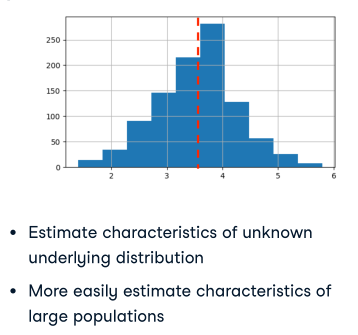

>  Regardless of the shape of the distribution you're taking sample means from, the central limit theorem will apply if the sampling distribution contains enough sample means.

**Sample mean and see the central limit theorem in action**

* Create a histogram of the num_users column of amir_deals and show the plot.

```
amir_deals['num_users'].hist()
plt.show()
```

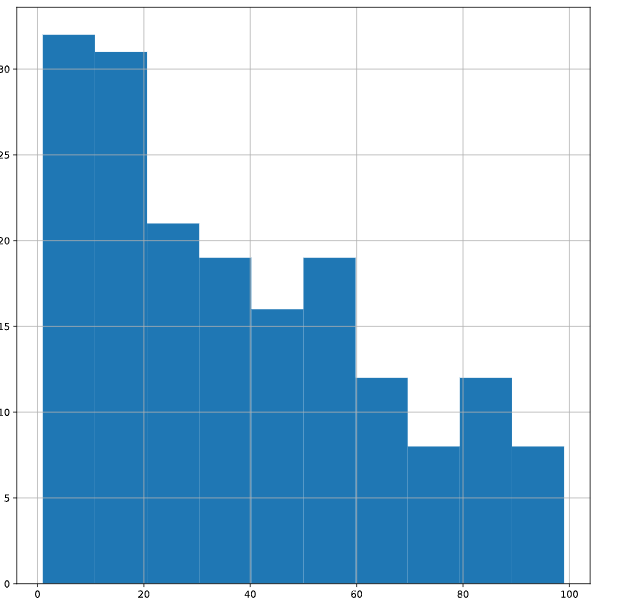

* Set the seed to 104.
* Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean.

```
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))
```

```
32.0
```

* Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.

```
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)
```
```
[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]
```

* Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.

```
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()
```

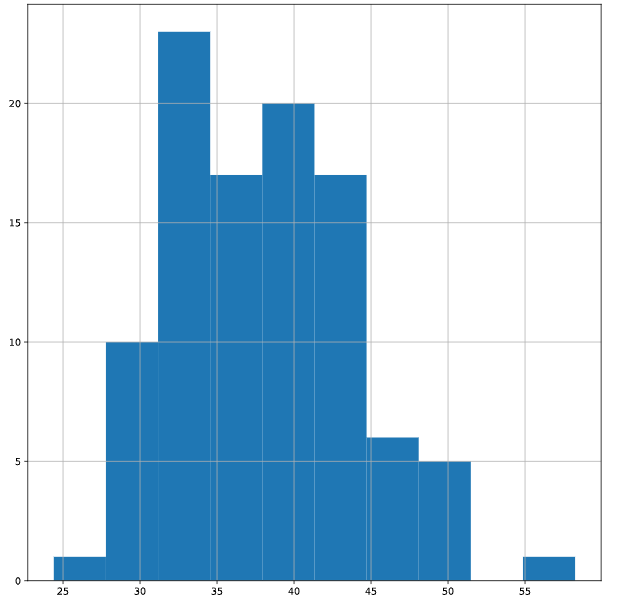

> Even though the distribution of num_users is not normal, the distribution of its sample means resembles the normal distribution.

**What the average number of users (num_users) is per deal for the entire company to compare the results of one agent**

Over the past year, the company has worked on more than ten thousand deals, so it's not realistic to compile all the data. Instead, you'll estimate the mean by taking several random samples of deals, since this is much easier than collecting data from everyone in the company.

* Set the random seed to 321.
* Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means.
* Print the mean of sample_means.
* Print the mean of the num_users column of amir_deals.

```
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))
```

```
<script.py> output:
    38.31333333333332
    37.651685393258425
```


###The Poisson distribution

**What is a poisson process?** *is a process where events appear to happen at a certain rate, but completely at random.*

> For example, the number of animals adopted from an animal shelter each week is a Poisson process - we may know that on average there are 8 adoptions per week, but this number can differ randomly. Other examples would be the number of people arriving at a restaurant each hour, or the number of earthquakes per year in California. The time unit like, hours, weeks, or years, is irrelevant as long as it's consistent.

**What is a Poisson distribution?** *The Poisson distribution describes the probability of some number of events happening over a fixed period of time.*

> We can use it to calculate the probability of at least 5 animals getting adopted in a week, the probability of 12 people arriving in a restaurant in an hour, or the probability of fewer than 20 earthquakes in California in a year.

! The Poisson distribution is described by a value called *lambda*, which represents the **average number of events per time period**.


In the animal shelter example, this would be the average number of adoptions per week, which is 8. This value is also the expected value of the distribution! The Poisson distribution with lambda equals 8 looks like this:
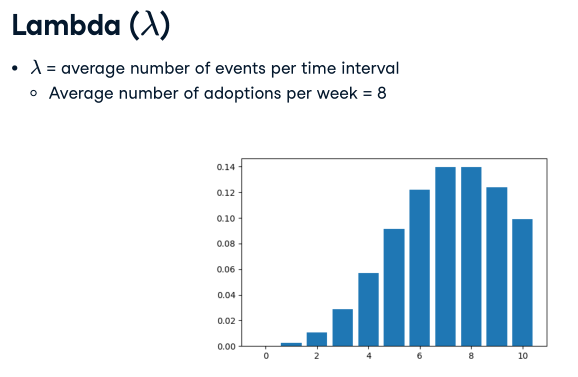

*Lambda is the distribution's peak* Lambda changes the shape of the distribution, so a Poisson distribution with lambda equals 1, in blue, looks quite different than a Poisson distribution with lambda equals 8, in green, but no matter what, the distribution's peak is always at its lambda value.

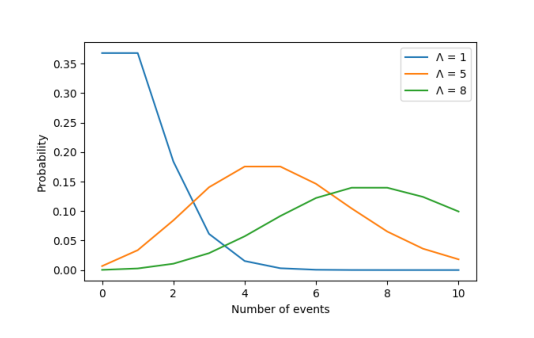

*Probability of a single value in poisson distribution*

What's the probability of 5 adoptions in a week? Just like the other probability distributions, we can import poisson from ```scipy.stats```. We'll use the ```poisson.pmf``` function, passing 5 as the first argument and 8 as the second argument to indicate the distribution's mean. This gives us about 9%.

```
from scipy.stats import poisson
poisson.pmf(5, 8)
```
```
0.09160366
```





*Probability of less than or equal to* 

To get the probability that 5 or fewer adoptions will happen in a week, use the poisson.cdf function, passing in the same numbers. This gives us about 20%.

```
from scipy.stats import poisson
poisson.cdf(5, 8)
```
```
0.1912361
```

*Probability of greater than*

Just like other probability functions you've learned about so far, take 1 minus the "less than or equal to 5" probability to get the probability of more than 5 adoptions. There's an 81% chance that more than 5 adoptions will occur. If the average number of adoptions rises to 10 per week, there will be a 93% chance that more than 5 adoptions will occur.

```
1 - poisson.cdf(5, 8)
```
```
0.8087639
```

```
#If the average number of adoptions per week is 10, what is P(# adoptions in a week > 5) ?
1 - poisson.cdf(5, 10)
```
```
0.932914
```

*Sampling from a Poisson distribution*

We can take samples from Poisson distributions using ```poisson.rvs```. Here, we'll simulate 10 different weeks at the animal shelter. In one week, there are 14 adoptions, but only 6 in another.

```
from scipy.stats import poisson
poisson.rvs(8, size=10)
```
```
array([ 9, 9, 8, 7, 11, 3, 10, 6, 8, 14])
```

>The CLT still applies!
Just like other distributions, the sampling distribution of sample means of a Poisson distribution looks normal with a large number of samples.



**Calculating probability in poisson distribution**

The number of lead responses is a countable outcome over a period of time, this scenario corresponds to a Poisson distribution. On average, Amir responds to 4 leads each day. In this exercise, you'll calculate probabilities of Amir responding to different numbers of leads.

* Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.


In [ ]:
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


* Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [ ]:
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

0.17140068409793663


* What's the probability that Amir responds to 2 or fewer leads in a day?

In [ ]:
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

0.23810330555354436


* What's the probability that Amir responds to more than 10 leads in a day?

In [ ]:
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


###Exponential distribution
*represents the probability of a certain time passing between Poisson events.*

It can be used to calculate, the probability of more than 1 day between adoptions, the probability of fewer than 10 minutes between restaurant arrivals, and the probability of 6-8 months passing between earthquakes.

Just like the Poisson distribution, **the time unit doesn't matter as long as it's consistent.**

> The exponential distribution uses the same lambda value, which represents the rate, that the Poisson distribution does. Note that lambda and rate mean the same value in this context. It's also continuous, unlike the Poisson distribution, since it represents time.


**Exponential distribution - example**

One customer service ticket is created every 2 minutes. We can rephrase this so it's in terms of a time interval of one minute, so half of a ticket is created each minute. We'll use 0.5 as the lambda value. The exponential distribution with a rate of one half looks like this.

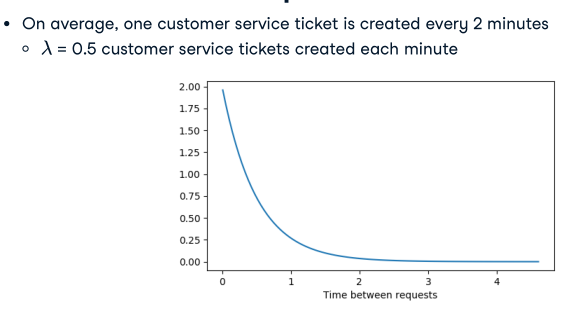
The rate affects the shape of the distribution and how steeply it declines.

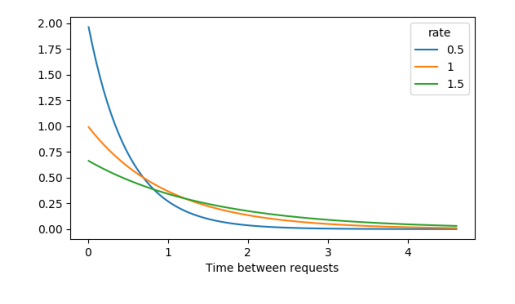




**Expected value of exponential distribution**

Lambda is the expected value of the Poisson distribution, which measures frequency in terms of rate or number of events. In our customer service ticket example, this means that the expected number of requests per minute is point-5. The exponential distribution measures frequency in terms of time between events. The expected value of the exponential distribution can be calculated by taking 1 divided by lambda. In our example, the expected time between requests is 1 over one half, which is 2, so there is an average of 2 minutes between requests.

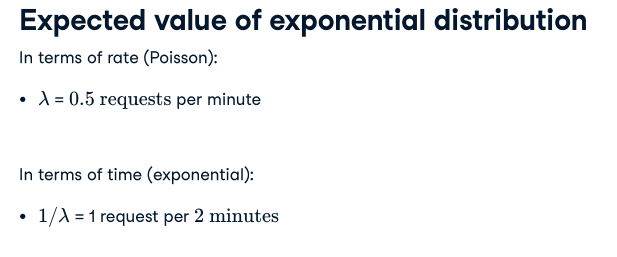

**Calculating probability in exponential distribution**

Use ```expon.cdf``` to calculate probabilities. The probability of waiting less than 1 minute for a new request is calculated using expon-cdf, passing in 1 followed by scale equals 0.5, which gives us about an 86% chance.





In [5]:
from scipy.stats import expon
#P(wait < 1 min) =
expon.cdf(1, scale=0.5)

0.8646647167633873

The probability of waiting more than 3 minutes can be found using 1 minus expon-cdf of 3, scale equals point 5, giving a 0.2% chance.

In [6]:
#P(wait > 3 min) =
1- expon.cdf(3, scale=0.5)

0.0024787521766663767

The probability of waiting between 1 and 3 minutes can be found by taking expon-cdf of 3 and subtracting expon-cdf of 1. There's a 13% chance you'll wait between 1 and 3 minutes.

In [7]:
#P(1 min < wait < 3 min) =
expon.cdf(3, scale=0.5) - expon.cdf(1, scale=0.5)

0.13285653105994633

**(Student's) t-distribution**

Its shape is similar to the normal distribution

##Correlation and Experimental Design